# Keras Practice

In [114]:
## General packages
import pandas as pd
import numpy as np

## Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ML
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from keras.layers import LeakyReLU

In [126]:
df = pd.read_csv('StudentsPerformance.csv')

In [127]:
ml_df = pd.get_dummies(df, drop_first = True)
ml_df.loc[:, ['reading score', 'writing score']] = normalize(ml_df.loc[:, ['reading score', 'writing score']], axis = 0)

In [44]:
pca = PCA(n_components = 1)
pca_col = pca.fit_transform(ml_df.loc[:, ['reading score', 'writing score']])

In [128]:
ml_df.drop(columns = ['reading score', 'writing score'], inplace = True)
#ml_df.loc[:, 'pca1'] = pca_col

In [46]:
ml_df

,math score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,pca1
0,72,0,1,0,0,0,1,0,0,0,0,1,1,-0.002830
1,69,0,0,1,0,0,0,0,0,1,0,1,0,-0.012975
2,90,0,1,0,0,0,0,0,1,0,0,1,1,-0.016159
3,47,1,0,0,0,0,0,0,0,0,0,0,1,0.011667
4,76,1,0,1,0,0,0,0,0,1,0,1,1,-0.005003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,0,0,0,0,1,0,0,1,0,0,1,0,-0.018048
996,62,1,0,1,0,0,0,1,0,0,0,0,1,0.008656
997,59,0,0,1,0,0,0,1,0,0,0,0,0,0.000444
998,68,0,0,0,1,0,0,0,0,1,0,1,0,-0.005662


In [148]:
def rmse(pred, y):
    
    rmse = np.sqrt(sum((y - pred)**2) / len(pred))
    
    return rmse

Prep data

In [130]:
X = ml_df.drop(columns = ['math score'])
y = ml_df.loc[:, 'math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

In [131]:
lasso = Lasso(alpha = .01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
lass_pred = lasso.predict(X_test)

In [133]:
lasso.coef_

array([ 5.14622288,  0.6412187 ,  1.61426598,  4.27756987,  9.76949971,
        3.2772058 , -3.70780848,  2.90200487, -0.66018253, -4.20833131,
       10.66055393, -5.90899774])

In [134]:
rmse(lass_pred, y_test)

13.182343212149451

Keras Model

In [149]:
class TrainKerasModel:
    
    def __init__(self, data):
        
        self.data = data
        self.X = self.data.drop(columns = ['math score'])
        self.y = self.data.loc[:, 'math score']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = .05, random_state = 2)
        
        
    def train(self, measurement = rmse, runs = 5):
        measurement_errors = list()

        for x in range(runs):
            model = Sequential()
            model.add(Dense(15, input_dim = 12, activation = 'relu'))
            model.add(Dense(10, activation = 'relu'))
            model.add(Dense(8, activation = 'relu'))
            model.add(Dense(4, activation = 'relu'))
            model.add(Dense(4, activation = 'relu'))
            model.add(Dense(1, activation = 'linear'))

            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(self.X_train, self.y_train, epochs = 150, batch_size = 10, verbose=0)
            predictions = model.predict(self.X_test)
            measurement_errors.append(measurement(predictions.reshape(50), self.y_test))
    
        self.rmse_errors = measurement_errors
        self.predictions = predictions
        

In [150]:
keras = TrainKerasModel(ml_df)
keras.train(runs = 1)

In [151]:
keras.rmse_errors

[13.57865983244391]

ValueError: operands could not be broadcast together with shapes (200,) (50,) 

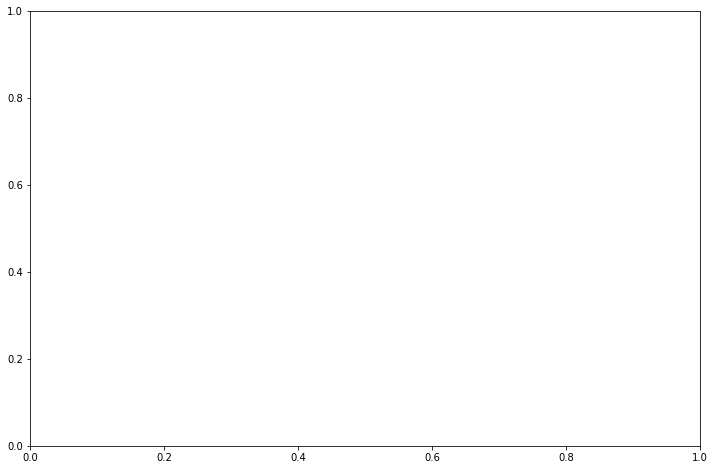

In [153]:
fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(abs(y_test - keras.predictions.reshape(50)), y_test)

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

sns.distplot(y_test - keras.predictions.reshape(200), bins = 20)